In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [2]:
df = pd.read_csv('C:/Users/Vikash/Desktop/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


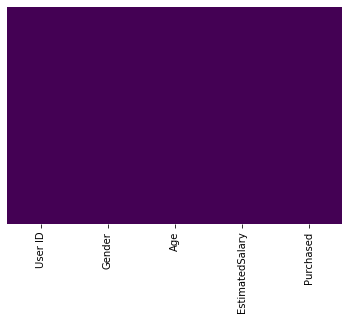

In [3]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe

<bound method NDFrame.describe of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [6]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [9]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
list1=['Gender']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [10]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [12]:
X = df[['User ID', 'Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

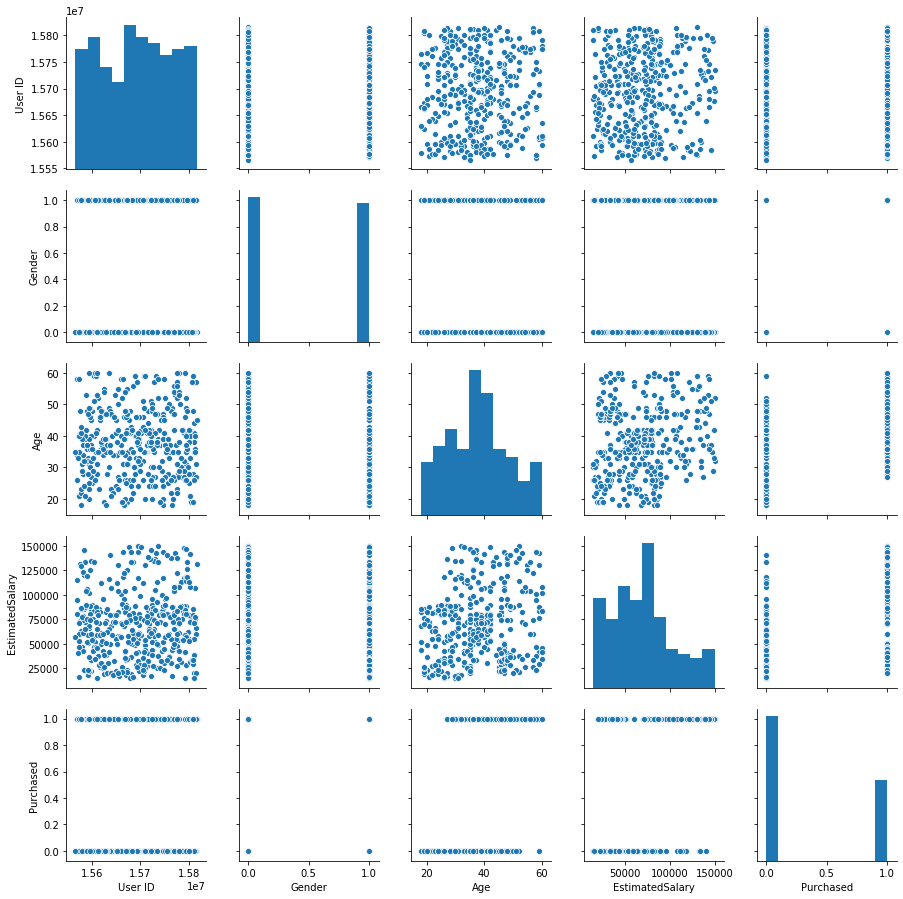

In [13]:
sns.pairplot(df)

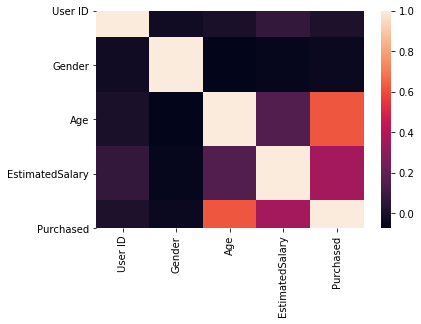

In [14]:
sns.heatmap(df.corr())

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [18]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)
predict = dtc.predict(X_test)
print(accuracy_score(y_test,predict))
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

0.85625
[[94 14]
 [ 9 43]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       108
           1       0.75      0.83      0.79        52

    accuracy                           0.86       160
   macro avg       0.83      0.85      0.84       160
weighted avg       0.86      0.86      0.86       160



In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [21]:
dtc.score(X_train,y_train)


1.0